In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS = robjects.r['readRDS']

import matplotlib.pyplot as plt

# local quality

In [2]:
prog = ["SDM", "MAESTRO", "mCSM", "CUPSAT", "MuPro", "real.table"]
df = []
for i in range(6):
    df.append(readRDS(f"res.{prog[i]}.rds"))
    df[i] = df[i].set_index("key")
    if i == 1 or i == 3:
        df[i]["PRED_DDG"] = -df[i]["PRED_DDG"]
    df[i] = df[i].add_prefix(f"{prog[i][0:2]}_")

In [3]:
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()

,SD_PDB,SD_Chain.ID,SD_POS,SD_WT,SD_MUT,SD_WT_SSE,SD_WT_RSA...,SD_WT_DEPTH..angstrom.,SD_WT_OSP,SD_WT_SS,...,CU_WT,CU_POS,CU_MUT,CU_PRED_DDG,Mu_PDB,Mu_POS,Mu_WT,Mu_MUT,Mu_PRED_DDG,re_DDG
key,,,,,,,,,,,,,,,,,,,,,
1A0F_S_11_A,1A0F,A,11,S,A,a,0.000000,7.91,0.539,0,...,S,11.0,A,-0.90,1A0F,11,S,A,-0.51785958,-1.8
1A5E_D_74_N,1A5E,A,74,D,N,b,15.600000,4.18,0.435,1,...,D,74.0,N,-4.03,1A5E,74,D,N,-1.4072279,-2.0
1A5E_P_81_L,1A5E,A,81,P,L,H,0.000000,8.53,0.547,0,...,P,81.0,L,3.93,1A5E,81,P,L,-0.35977395,0.0
1A5E_D_84_N,1A5E,A,84,D,N,H,3.200000,5.65,0.547,1,...,D,84.0,N,0.67,1A5E,84,D,N,-0.092715812,-0.1
1A7C_R_30_E,1A7C,A,30,R,E,b,65.099998,3.27,0.285,0,...,R,30.0,E,-0.24,1A7C,30,R,E,-1.1570861,-1.2


In [4]:
ddg = result[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG", "CU_PRED_DDG", "Mu_PRED_DDG", "re_DDG"]].dropna().astype(float)
ddg.head()

,SD_PRED_DDG,MA_PRED_DDG,mC_PRED_DDG,CU_PRED_DDG,Mu_PRED_DDG,re_DDG
key,,,,,,
1A0F_S_11_A,0.60,-0.761365,-0.970,-0.90,-0.517860,-1.8
1A5E_D_74_N,0.19,-1.594357,-0.214,-4.03,-1.407228,-2.0
1A5E_P_81_L,3.38,0.528720,-0.932,3.93,-0.359774,0.0
1A5E_D_84_N,0.47,-1.216384,-1.141,0.67,-0.092716,-0.1
1A7C_R_30_E,-0.24,-0.958248,0.058,-0.24,-1.157086,-1.2


In [5]:
ddg.describe()

,SD_PRED_DDG,MA_PRED_DDG,mC_PRED_DDG,CU_PRED_DDG,Mu_PRED_DDG,re_DDG
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,-0.882562,-1.140850,-1.251491,-1.441054,-1.159607,-1.275960
std,1.399059,1.209585,0.929274,1.680753,0.708660,1.763006
min,-4.770000,-4.947374,-3.886000,-9.450000,-3.826147,-10.800000
25%,-1.747500,-1.869045,-1.935000,-2.297500,-1.578998,-2.317758
50%,-0.500000,-0.957879,-1.134500,-1.330000,-1.107221,-0.932568
75%,0.117500,-0.186543,-0.554250,-0.420000,-0.658255,-0.111667
max,3.380000,1.163373,1.412000,11.040000,0.818485,6.166667


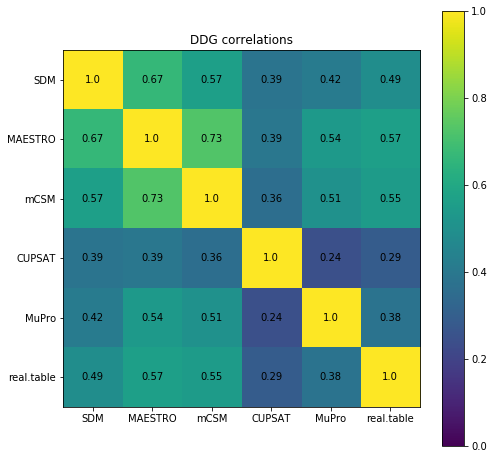

In [6]:
plt.figure(figsize=(8,8))
corr = np.corrcoef(ddg.T)
plt.title("DDG correlations")
plt.imshow(corr, vmin=0, vmax=1)
plt.xticks(range(len(prog)), prog)
plt.yticks(range(len(prog)), prog)
for i in range(len(prog)):
    for j in range(len(prog)):
        plt.text(i, j, np.round(corr[i, j], 2), {"ha":"center", "va":"center"})
plt.colorbar()

In [7]:
ddg.head()

,SD_PRED_DDG,MA_PRED_DDG,mC_PRED_DDG,CU_PRED_DDG,Mu_PRED_DDG,re_DDG
key,,,,,,
1A0F_S_11_A,0.60,-0.761365,-0.970,-0.90,-0.517860,-1.8
1A5E_D_74_N,0.19,-1.594357,-0.214,-4.03,-1.407228,-2.0
1A5E_P_81_L,3.38,0.528720,-0.932,3.93,-0.359774,0.0
1A5E_D_84_N,0.47,-1.216384,-1.141,0.67,-0.092716,-0.1
1A7C_R_30_E,-0.24,-0.958248,0.058,-0.24,-1.157086,-1.2


In [15]:
from sklearn.preprocessing import minmax_scale

In [9]:
s = minmax_scale(ddg[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG"]].std(axis=1).values)
S = ddg[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG"]].std(axis=1).values
l = [] # lenght

corr = np.zeros((49, 3))

for num, i in enumerate(np.linspace(0, 1, 50)[::-1][:-1]):
    mask = i > s
    tmp = ddg[mask]
    l.append(sum(mask))
    #print(np.corrcoef(tmp.T)[0:3][5])
    corr[num, :] = np.corrcoef(tmp.T)[5, 0:3]

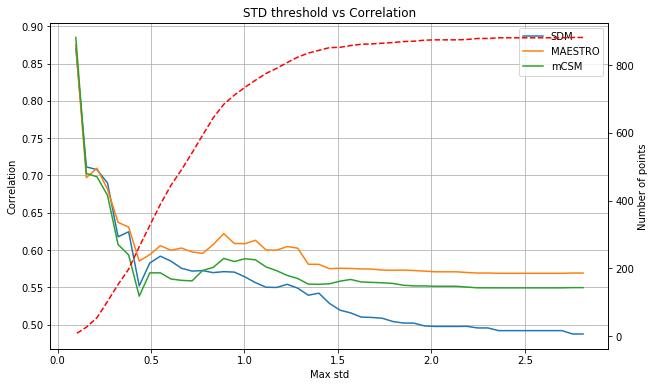

In [10]:
std = (np.linspace(0, 1, 50)[::-1][:-1] + min(S)) * (max(S) - min(S))

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.title("STD threshold vs Correlation")

for num, i in enumerate(prog[:3]):
    ax1.plot(std, corr[:, num], label=prog[num])
    
ax2.plot(std, l, '--', c="red")

ax1.legend()
ax1.set_xlabel("Max std")
ax1.set_ylabel("Correlation")
ax2.set_ylabel("Number of points")
ax1.grid()

In [11]:
[0.01] + np.arange(0.25, 3, 0.5)

array([0.26, 0.76, 1.26, 1.76, 2.26, 2.76])

Text(0, 0.5, 'real ddG')

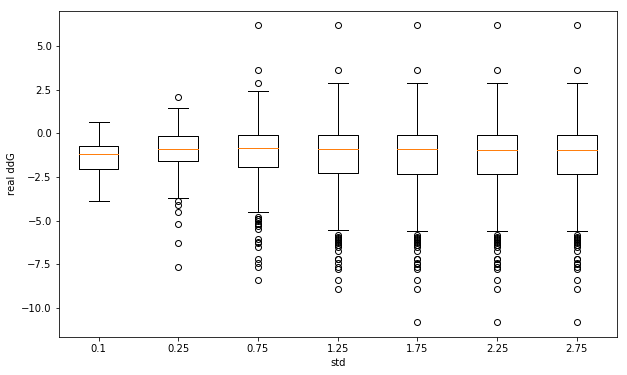

In [12]:
bp = []
for i in np.concatenate([[0.1], np.arange(0.25, 3, 0.5)]):
    bp.append(ddg[ddg[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG"]].std(axis=1).values < i]["re_DDG"].values)
    
plt.figure(figsize=(10, 6))
plt.boxplot(bp)
plt.xticks(range(1, 8), np.concatenate([[0.1], np.arange(0.25, 3, 0.5)]))
plt.xlabel("std")
plt.ylabel("real ddG")

# SDM quality

In [5]:
df = []
df.append(readRDS(f"res.full.SDM.rds"))
df[0] = df[0].set_index("key")
df[0] = df[0].add_prefix(f"S_")
df.append(readRDS(f"res.real.table.rds"))
df[1] = df[1].set_index("key")
df[1] = df[1].add_prefix(f"R_")

In [6]:
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()
#result.shape

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,S_MT_SSE,S_MT_RSA...,S_MT_DEPTH..angstrom.,S_MT_OSP,S_MT_SS,S_MT_SN,S_MT_SO,S_PRED_DDG,S_Outcome,R_DDG
key,,,,,,,,,,,,,,,,,,,,,
1A43_G_156_A,1A43,A,156,G,A,p,54.799999,4.02,0.418,0,...,p,56.299999,3.20,0.384,0,0,0,0.02,Increased stability,-1.90
1A43_E_159_D,1A43,A,159,E,D,p,25.299999,3.71,0.392,1,...,p,50.200001,3.78,0.242,0,0,0,-0.52,Reduced stability,-3.50
1A43_R_167_A,1A43,A,167,R,A,H,43.599998,3.57,0.312,1,...,H,52.799999,3.56,0.387,0,0,0,-0.09,Reduced stability,-3.05
1A43_W_184_A,1A43,A,184,W,A,H,82.099998,3.40,0.173,0,...,H,77.500000,3.22,0.320,0,0,0,0.47,Increased stability,-0.70
1A43_C_218_S,1A43,A,218,C,S,a,9.200000,4.84,0.438,0,...,t,20.900000,4.32,0.357,1,0,0,-0.93,Reduced stability,-2.55


In [7]:
ddg = result[["S_PRED_DDG", "R_DDG"]]
ddg['AvDiv'] = np.abs(ddg['S_PRED_DDG'] - ddg['R_DDG'])
ddg.head()

/home/dpreer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,S_PRED_DDG,R_DDG,AvDiv
key,,,
1A43_G_156_A,0.02,-1.90,1.92
1A43_E_159_D,-0.52,-3.50,2.98
1A43_R_167_A,-0.09,-3.05,2.96
1A43_W_184_A,0.47,-0.70,1.17
1A43_C_218_S,-0.93,-2.55,1.62


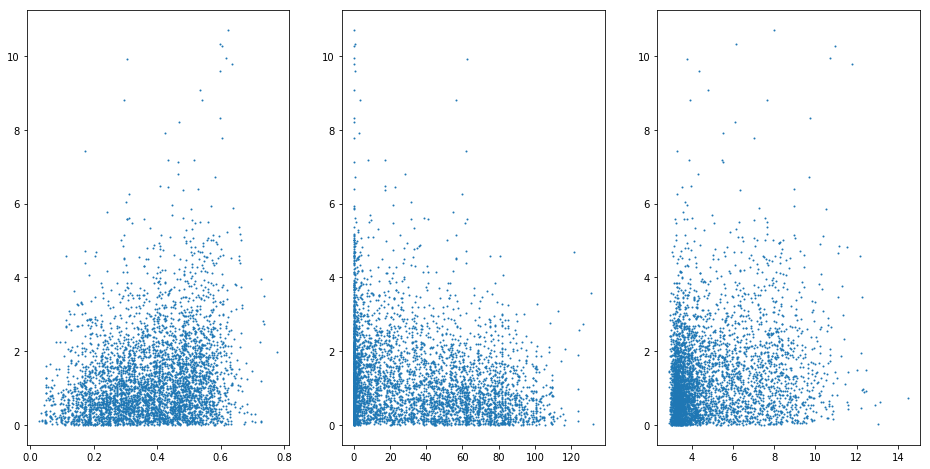

In [16]:
plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.scatter(result['S_WT_OSP'], ddg['AvDiv'], s=1)
plt.subplot(132)
plt.scatter(result['S_WT_RSA...'], ddg['AvDiv'], s=1)
plt.subplot(133)
plt.scatter(result['S_MT_DEPTH..angstrom.'], ddg['AvDiv'], s=1)

/home/dpreer/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


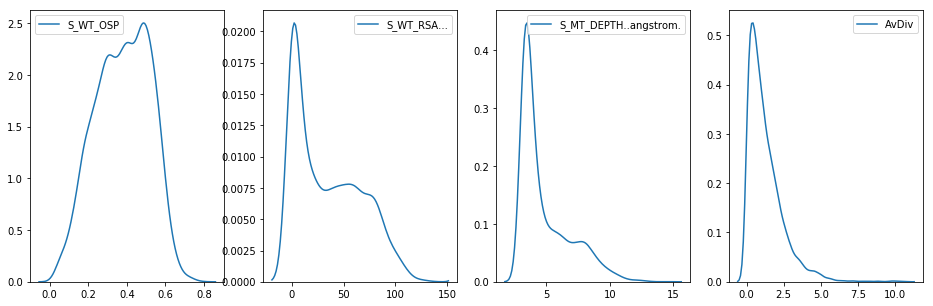

In [17]:
plt.figure(figsize=(16, 5))
plt.subplot(141)
sb.kdeplot(result['S_WT_OSP'])
plt.subplot(142)
sb.kdeplot(result['S_WT_RSA...'])
plt.subplot(143)
sb.kdeplot(result['S_MT_DEPTH..angstrom.'])
plt.subplot(144)
sb.kdeplot(ddg['AvDiv'])


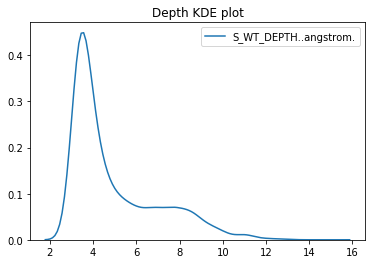

In [18]:
plt.title("Depth KDE plot")
sb.kdeplot(result["S_WT_DEPTH..angstrom."])

# Global quality

In [18]:
#prog = ["SDM", "MAESTRO", "mCSM", "CUPSAT"]
prog = ["SDM", "MAESTRO", "mCSM"]
df = []
for i in range(3):
    df.append(pandas2ri.ri2py(readRDS(f"res.ready.{prog[i]}.rds")))
    df[i] = df[i].set_index("key")
    if i == 1: #or i == 3:
        df[i]["PRED_DDG"] = -df[i]["PRED_DDG"]
    df[i] = df[i].add_prefix(f"{prog[i][0]}_")
    

In [4]:
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,M_chain,M_WT,M_POS,M_MUT,M_PRED_DDG,m_PDB,m_WT,m_POS,m_MUT,m_PRED_DDG
key,,,,,,,,,,,,,,,,,,,,,
1AL0_M_1_A,1AL0,B,1,M,A,b,68.0,3.33,0.12,0,...,B,M,1,A,0.453225,1AL0,M,1.0,A,-0.143
1AL0_M_1_C,1AL0,B,1,M,C,b,68.0,3.33,0.12,0,...,B,M,1,C,0.520635,1AL0,M,1.0,C,-0.328
1AL0_M_1_D,1AL0,B,1,M,D,b,68.0,3.33,0.12,0,...,B,M,1,D,1.035553,1AL0,M,1.0,D,0.276
1AL0_M_1_E,1AL0,B,1,M,E,b,68.0,3.33,0.12,0,...,B,M,1,E,1.273418,1AL0,M,1.0,E,0.230
1AL0_M_1_F,1AL0,B,1,M,F,b,68.0,3.33,0.12,0,...,B,M,1,F,0.744781,1AL0,M,1.0,F,-0.127


In [5]:
ddg = result[["S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"]] #"C_PRED_DDG"]]
ddg.head()

,S_PRED_DDG,M_PRED_DDG,m_PRED_DDG
key,,,
1AL0_M_1_A,0.0,0.453225,-0.143
1AL0_M_1_C,0.0,0.520635,-0.328
1AL0_M_1_D,0.0,1.035553,0.276
1AL0_M_1_E,0.0,1.273418,0.230
1AL0_M_1_F,0.0,0.744781,-0.127


## Strange zeros for SDM

In [22]:
len(ddg["S_PRED_DDG"].unique()), len(ddg["S_PRED_DDG"])

(745, 43318)

In [23]:
np.array(result[ddg["S_PRED_DDG"] == 0]["S_PDB"].drop_duplicates())

array(['1AL0', '1B8X', '1DEV', '1DZF', '1GKU', '1INP', '1IO1', '1IXM',
       '1LML', '1MUK', '1N0U', '1N7D', '1OW1', '1QSA', '1UOY', '1UX6',
       '1W6K', '1X0T', '1ZHX', '2AYD', '2CI8', '2CIU', '2EGT', '2G3R',
       '2HD9', '2ILR', '2LIS', '2NYK', '2O9U', '2OML', '2QKD', '2VDF',
       '2WB0', '2WP7', '2X3M', '2XJP', '2ZJ8', '3A57', '3BG1', '3BXJ',
       '3DKM', '3EH1', '3MTV', '3O4Z', '3P5J', '3PFG', '3PMQ', '3PR9',
       '3RGZ', '3RKG', '3TCQ', '3TTC', '3UH8', '3VEN', '3WNZ', '3ZHE',
       '3ZZO', '4AEQ', '4AK1', '4APM', '4BKW', '4FO0', '4HCW', '4HS2',
       '4IM0', '4K51', '4O65', '4WFO', '4WHI', '5GV0'], dtype=object)

## PCA with explained ratio

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler as SS

In [25]:
ddg.describe()

,S_PRED_DDG,M_PRED_DDG,m_PRED_DDG
count,43318.000000,43318.000000,43318.000000
mean,-0.549115,-0.467089,-0.888284
std,1.152919,0.937190,0.934734
min,-4.800000,-5.885050,-4.955000
25%,-1.160000,-0.811285,-1.416000
50%,-0.340000,-0.200292,-0.735000
75%,0.200000,0.110153,-0.231000
max,4.690000,2.061828,2.857000


In [26]:
model = PCA()
model = Pipeline([("ss", SS()),
                  ("pca", PCA())])
ans = model.fit_transform(ddg)

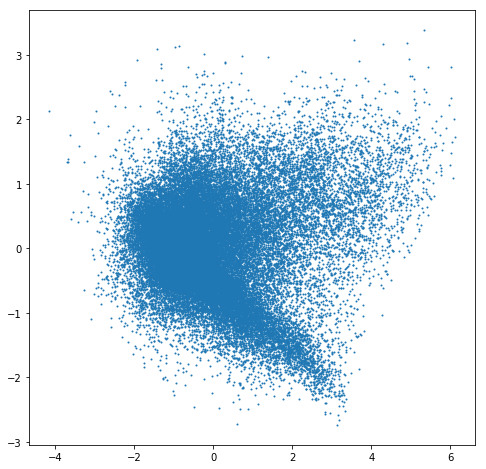

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(ans[:, 0], ans[:, 1], s=1)

In [28]:
model.steps[1][1].explained_variance_ratio_

array([0.63172349, 0.19317763, 0.17509889])

In [29]:
model.steps["svm"].explained_variance_ratio_, np.cumsum(model.explained_variance_ratio_)

TypeError: list indices must be integers or slices, not str

## TSNE

In [19]:
from sklearn.manifold import TSNE

In [ ]:
model = TSNE()
model = Pipeline([("ss", SS()),
                  ("t-SNE", TSNE(random_state=42))])
ans = model.fit_transform(ddg)

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(ans[:, 0], ans[:, 1], s=1)

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("SSE on tSNE of ddG ")
for i in result.S_WT_SSE.unique():
    tmp = ans[result["S_WT_SSE"] == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Wild type Amino Acids")
for i in result.S_WT.unique():
    tmp = ans[result["S_WT"] == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Mutated Amino Acids")
for i in result.S_WT.unique():
    tmp = ans[result["S_MUT"] == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Depth")
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=np.log(result["S_WT_DEPTH..angstrom."]))
plt.colorbar()

In [ ]:

plt.figure(figsize=(16, 16))

plt.subplot(221)
plt.title("SN + SO + SS")

t = result["S_WT_SN"].astype(str) + result["S_WT_SO"].astype(str) + result["S_WT_SS"].astype(str)
for i in sorted(t.unique()):
    tmp = ans[t == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=i)
plt.legend()


for num, i in enumerate(["SN", "SO", "SS"]):
    plt.subplot(222 + num)
    plt.title(i)
    t = result[f"S_WT_{i}"]
    for j in [0, 1]:
        plt.scatter(ans[t == j, 0], ans[t == j, 1], s=1, label=str(j))
    plt.legend()

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title("Min value of ddG")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.min(axis=1))
plt.colorbar()

plt.subplot(122)
plt.title("Max value of ddG")
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.max(axis=1))
plt.colorbar()

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("STD")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1) < 0.5)

#plt.colorbar()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm_1 = LinearSegmentedColormap.from_list('cmap_name', [(0.267004, 0.004874, 0.329415), (0,1,0)][::-1], N=1)
cm_2 = LinearSegmentedColormap.from_list('cmap_name', [(0.993248, 0.906157, 0.143936), (0,1,0)][::-1], N=1)


"""_viridis_data = [[0.267004, 0.004874, 0.329415],
                 [0.268510, 0.009605, 0.335427],
                 [0.269944, 0.014625, 0.341379],
                 :
                 [0.983868, 0.904867, 0.136897],
                 [0.993248, 0.906157, 0.143936]]"""

In [ ]:
import seaborn as sns

In [ ]:
f, ax = plt.subplots(figsize=(9, 9))
sns.kdeplot(ans[ddg.values.std(axis=1) < 0.5][:, 0], ans[ddg.values.std(axis=1) < 0.5][:, 1], ax=ax, shade=True, n_levels=3, shade_lowest=False, alpha=0.15,
            cmap=cm_2, gridsize=130,  bw=1.5)
sns.kdeplot(ans[ddg.values.std(axis=1) > 0.5][:, 0], ans[ddg.values.std(axis=1) > 0.5][:, 1], ax=ax, shade=True, n_levels=3, shade_lowest=False, alpha=0.15,
            cmap=cm_1, gridsize=130, bw=1.5)
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1) < 0.5)

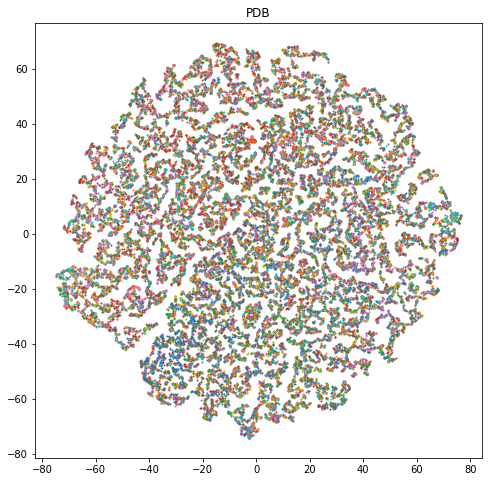

In [46]:
plt.figure(figsize=(8, 8))
plt.title("PDB")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
for i in result["m_PDB"].unique():
    plt.scatter(ans[result["m_PDB"] == i, 0], ans[result["m_PDB"] == i, 1], s=1, label=i)


## Feature Distribution

/home/dpreer/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


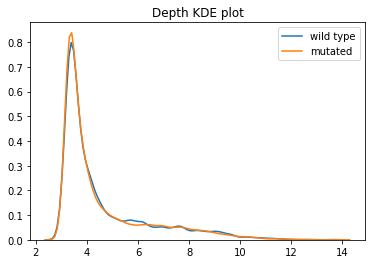

In [47]:
import seaborn as sb
#plt.hist(result["S_WT_DEPTH..angstrom."], bins=100)
plt.title("Depth KDE plot")
sb.kdeplot(result["S_WT_DEPTH..angstrom."], label="wild type")
sb.kdeplot(result["S_MT_DEPTH..angstrom."], label="mutated")


In [48]:
len(result["S_PDB"].unique())

114

In [49]:
114*20*20

45600

## Check program outliers

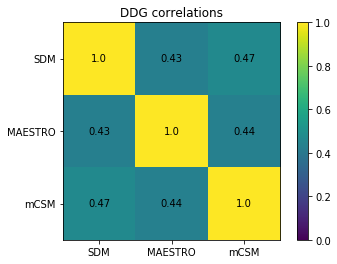

In [50]:
corr = np.corrcoef(ddg.T)
plt.title("DDG correlations")
plt.imshow(corr, vmin=0, vmax=1)
plt.xticks(range(len(prog)), prog)
plt.yticks(range(len(prog)), prog)
for i in range(len(prog)):
    for j in range(len(prog)):
        plt.text(i, j, np.round(corr[i, j], 2), {"ha":"center", "va":"center"})
plt.colorbar()

## BEST R2 to mean value

In [20]:
from sklearn.metrics import r2_score

In [47]:
ddg["

SyntaxError: EOL while scanning string literal (<ipython-input-47-90f5f5cdc2e4>, line 1)

## Classfication 0 - 0.5 - 2 - oo

## One Class SVM

In [54]:
from sklearn.svm import OneClassSVM

In [53]:
#outliers
out = Pipeline([("ss", SS()), 
                ("one_class_svm", OneClassSVM(nu=0.3, random_state=42))
               ])

outliers = out.fit_predict(ddg)

/home/dpreer/.local/lib/python3.6/site-packages/sklearn/svm/classes.py:1137: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


In [55]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([12997, 30321]))

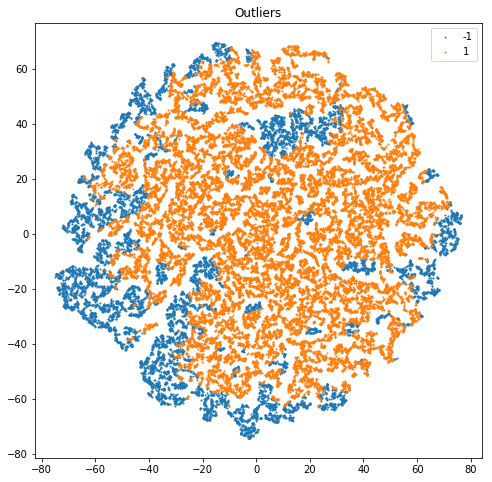

In [56]:
plt.figure(figsize=(8, 8))
plt.title("Outliers")
for i in [-1, 1]:
    tmp = ans[outliers == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=1, label=str(i))
plt.legend()

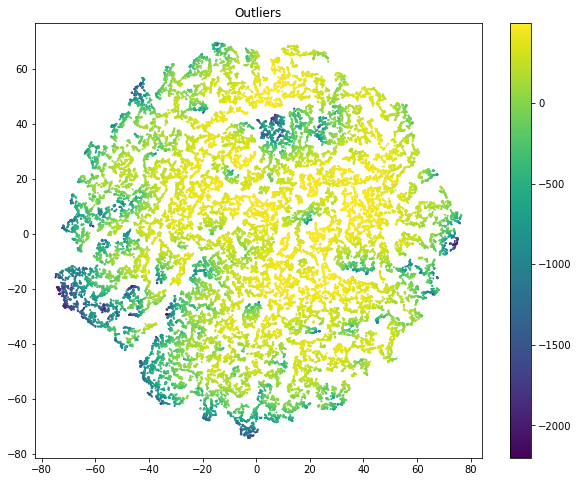

In [57]:
plt.figure(figsize=(10, 8))
plt.title("Outliers")
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=out.decision_function(ddg))
plt.colorbar()

In [58]:
np.corrcoef([out.decision_function(ddg), ddg.values.std(axis=1)])

array([[ 1.        , -0.71961634],
       [-0.71961634,  1.        ]])

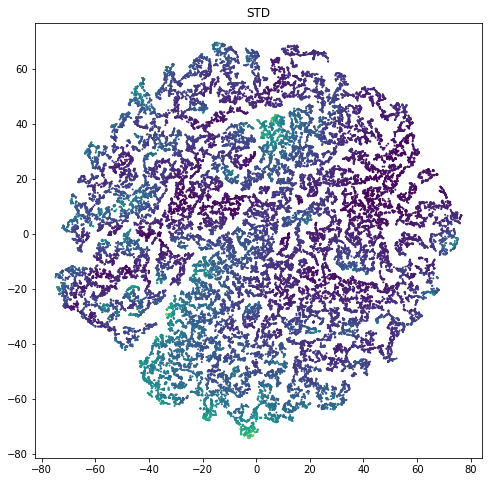

In [59]:
plt.figure(figsize=(8, 8))
plt.title("STD")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))


## Clustering

### DBSCAN 

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
cluster = Pipeline([("ss", SS()), 
                    ("clus", DBSCAN(metric="manhattan"))
                   ])

In [56]:
eps = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7]
cls = []


for i in eps:
        cls.append(Pipeline([("ss", SS()), 
                    ("clus", DBSCAN(min_samples=40, eps=i, metric="manhattan"))
                   ]))
        
    
for i in cls:
    i.fit(ddg)

In [57]:
for i in cls:
    print(len(np.unique(i.steps[1][1].labels_)))

1
1
7
6
2
2
2


In [58]:
np.unique(cls[3].steps[1][1].labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]),
 array([13485, 29673,    63,    26,    34,    37]))

In [59]:
lbs = cls.steps[1][1].labels_
lbs.u

AttributeError: 'list' object has no attribute 'steps'

In [ ]:
np.unique(lbs, return_counts=True)

## Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [ ]:
n_clust = 18

In [ ]:
cluster = Pipeline([("ss", SS()), 
                    ("clus", KMeans(n_clusters=n_clust, random_state=42))
                   ])

In [ ]:
cluster.fit(ddg)

In [ ]:
np.unique(cluster.steps[1][1].labels_, return_counts=True)

In [ ]:
L = cluster.steps[1][1].labels_

In [ ]:
tmp = ddg.copy()
tmp['std'] = tmp.values.std(axis=1)
tmp['class'] = L
std_sort = tmp.groupby('class')['std'].mean().sort_values().index.values#to_numpy()

replacemnt = {}

for new, old in enumerate(std_sort):
    replacemnt[old] = new
    
L = np.array([replacemnt[x] for x in L])

In [ ]:
plt.figure(figsize=(16, 16))
plt.rcParams.update({'font.size': 18})
#plt.title("Clusters")
plt.axis("off")
for i in range(n_clust):
    tmp = ans[L == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=60, label=str(i))
plt.legend()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm_1 = LinearSegmentedColormap.from_list('cmap_name', [(0.267004, 0.004874, 0.329415), (0,1,0)][::-1], N=1)
cm_2 = LinearSegmentedColormap.from_list('cmap_name', [(0.993248, 0.906157, 0.143936), (0,1,0)][::-1], N=1)

In [ ]:
#with background

plt.figure(figsize=(20, 20))
#plt.title("Clusters")
plt.axis("off")
sns.kdeplot(ans[ddg.values.std(axis=1) < 0.5][:, 0], ans[ddg.values.std(axis=1) < 0.5][:, 1], shade=True, n_levels=3, shade_lowest=False, alpha=0.15,
            cmap=cm_2, gridsize=100,  bw=1.6)
sns.kdeplot(ans[ddg.values.std(axis=1) > 0.5][:, 0], ans[ddg.values.std(axis=1) > 0.5][:, 1], shade=True, n_levels=3, shade_lowest=False, alpha=0.15,
            cmap=cm_1, gridsize=100, bw=1.6)

for i in range(n_clust):
    tmp = ans[L == i]
    plt.scatter(tmp[:, 0], tmp[:, 1], s=10, label=str(i))
#plt.legend()
# plt.savefig('a.png', dpi=200)

In [ ]:
plt.figure(figsize=(16, 16))
plt.title("STD")
#plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1))
plt.scatter(ans[:, 0], ans[:, 1], s=1, c=ddg.values.std(axis=1) < 0.5)

In [ ]:
#TODO radar plots

In [ ]:
result.sample(5)

In [ ]:
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 22})
plt.title("Depth")
plt.boxplot([result[L == i]["S_WT_DEPTH..angstrom."] for i in range(n_clust)])
plt.xticks(range(1, 19), range(18))
plt.show()

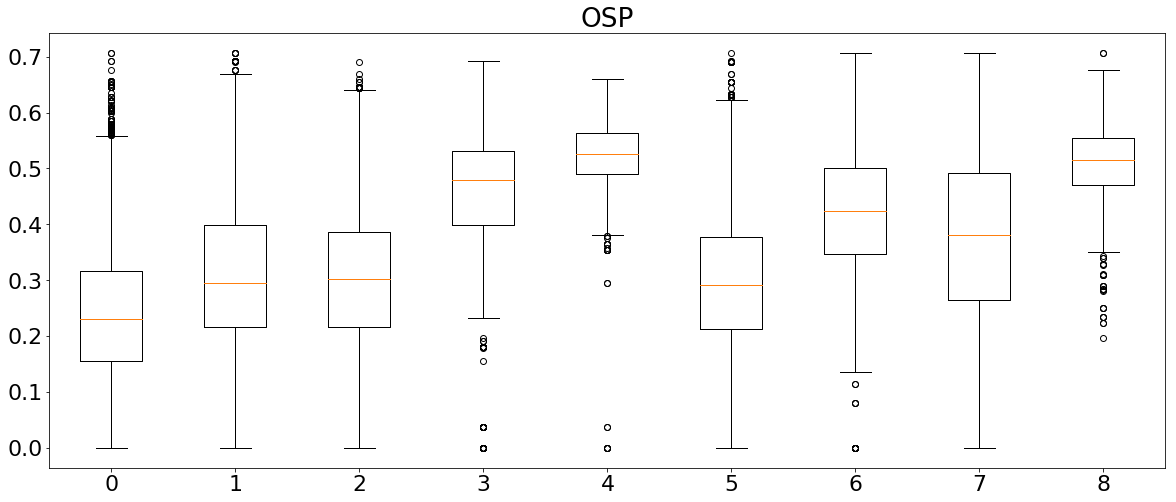

In [28]:
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 22})
plt.title("OSP")
plt.boxplot([result[L == i]["S_WT_OSP"] for i in range(n_clust)])
plt.xticks(range(1, 19), range(18))
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 22})
plt.title("RSA")
plt.boxplot([result[L == i]["S_WT_RSA..."] for i in range(n_clust)])
plt.xticks(range(1, 19), range(18))
plt.show()

In [30]:
ddg.head()

,S_PRED_DDG,M_PRED_DDG,m_PRED_DDG
key,,,
1AL0_M_1_A,0.0,0.453225,-0.143
1AL0_M_1_C,0.0,0.520635,-0.328
1AL0_M_1_D,0.0,1.035553,0.276
1AL0_M_1_E,0.0,1.273418,0.230
1AL0_M_1_F,0.0,0.744781,-0.127


In [ ]:
plt.figure(figsize=(16, 16))
plt.rcParams.update({'font.size': 11})
for num, p in enumerate(prog[:3]):
    plt.subplot(221 + num)
    plt.title(f"{p}")
    plt.boxplot([ddg[L == x][f"{p[0]}_PRED_DDG"] for x in range(n_clust)])
    plt.grid()
    plt.xticks(range(1, 19), range(18))

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Cluster Populations")
plt.xlabel("Cluster")
plt.ylabel("Population")
plt.xticks(range(9))
plt.bar(range(n_clust), np.unique(L, return_counts=True)[1], color=["C" + str(x) for x in range(9)])

([<matplotlib.axis.XTick at 0x7fd607944438>,
 <a list of 9 Text xticklabel objects>)

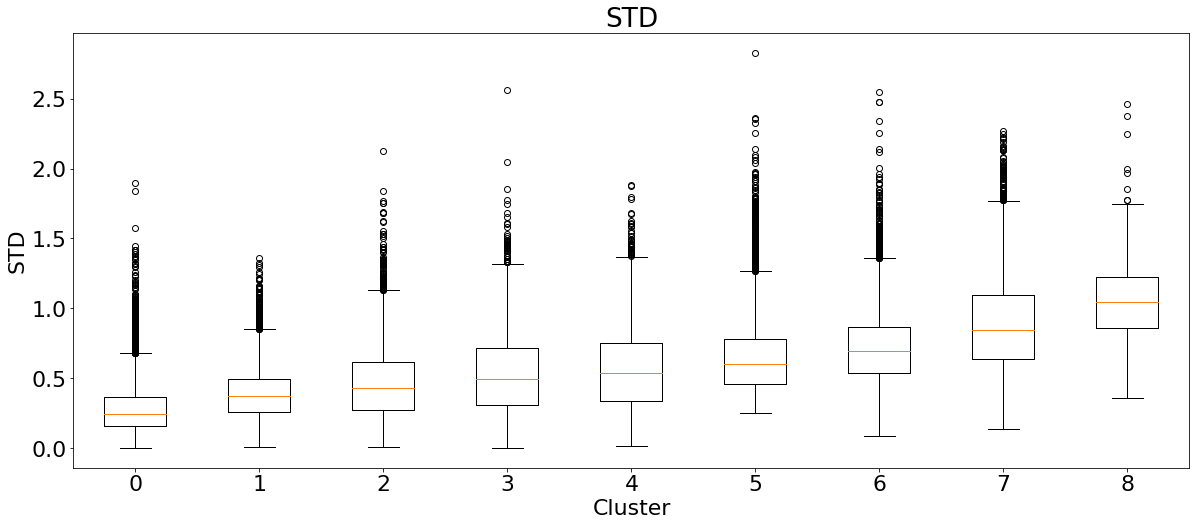

In [32]:
plt.figure(figsize=(20, 8))
plt.title("STD")
plt.boxplot([ddg[L == i].values.std(axis=1) for i in range(n_clust)])
plt.xlabel("Cluster")
plt.ylabel("STD")
plt.xticks(range(1, 10), range(9))

In [62]:
plt.rcParams.update({'font.size': 11})

<BarContainer object of 9 artists>

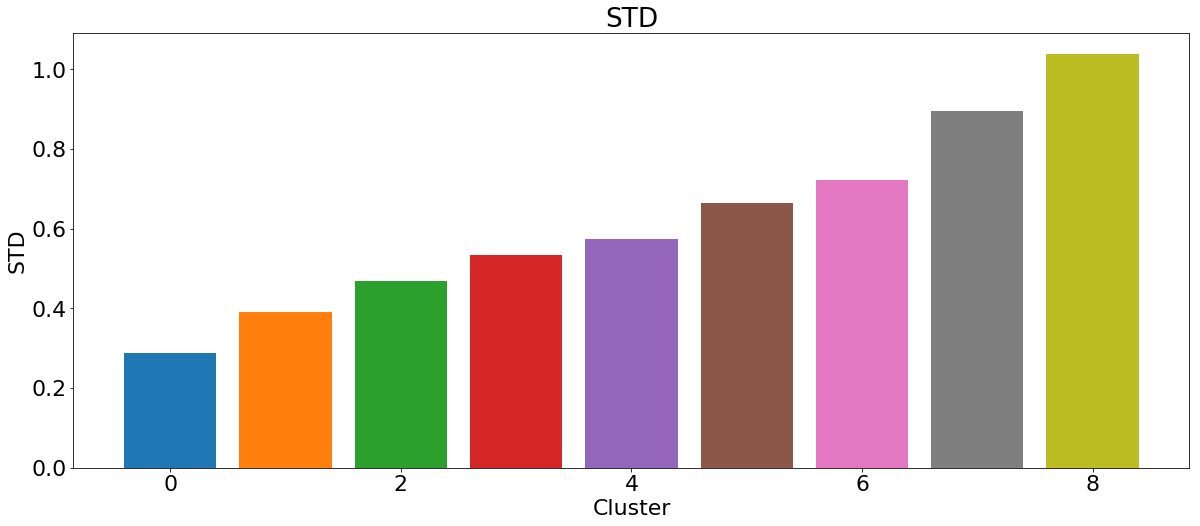

In [33]:
plt.figure(figsize=(20, 8))
plt.title("STD")
plt.ylabel("STD")
plt.xlabel("Cluster")
plt.bar(range(9), [ddg[L == i].values.std(axis=1).mean() for i in range(9)], color=["C" + str(x) for x in range(9)])

In [306]:

result.S_WT_SSE.unique()

array(['b', 'g', 'p', 'a', 'H', 'e', 't', 'l', 'E'], dtype=object)

In [35]:
import seaborn as sns

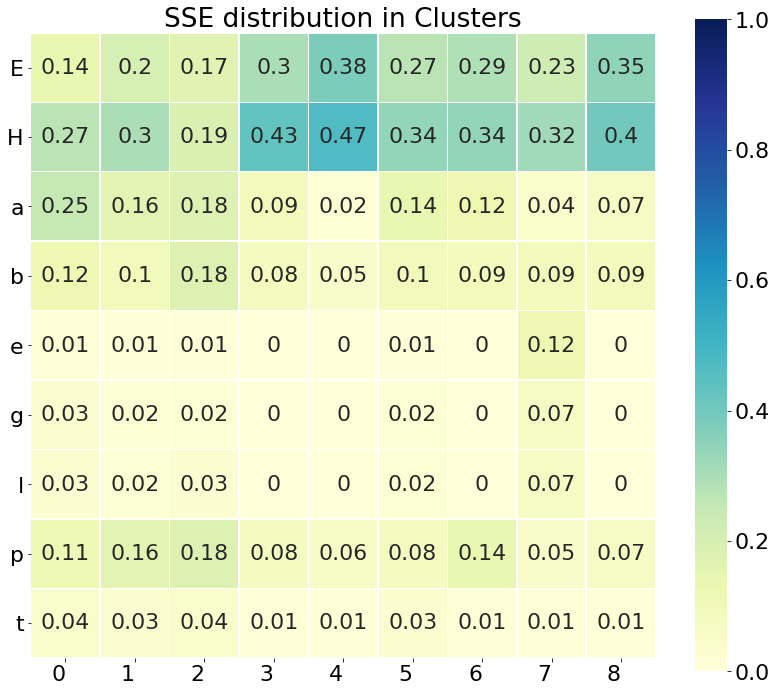

In [36]:
sse = sorted(list(result.S_WT_SSE.unique()))
cls = range(n_clust)

sse_table = np.zeros((len(sse), len(cls)))

for i, s in enumerate(sse):
    for j in cls:
        sse_table[i, j] = len(result[(L == j) & (result["S_WT_SSE"] == s)])
    
sse_table /= sse_table.sum(axis=0)
      


#plt.imshow(sse_table, vmin=0, vmax=0.5)
#plt.colorbar()
#plt.show()


plt.figure(figsize=(14, 12))
plt.title("SSE distribution in Clusters") 

ax = sns.heatmap(
    np.round(sse_table, 2), 
    vmin=0, vmax=1,
    cmap="YlGnBu",
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(range(9))
ax.set_yticklabels(sse)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);


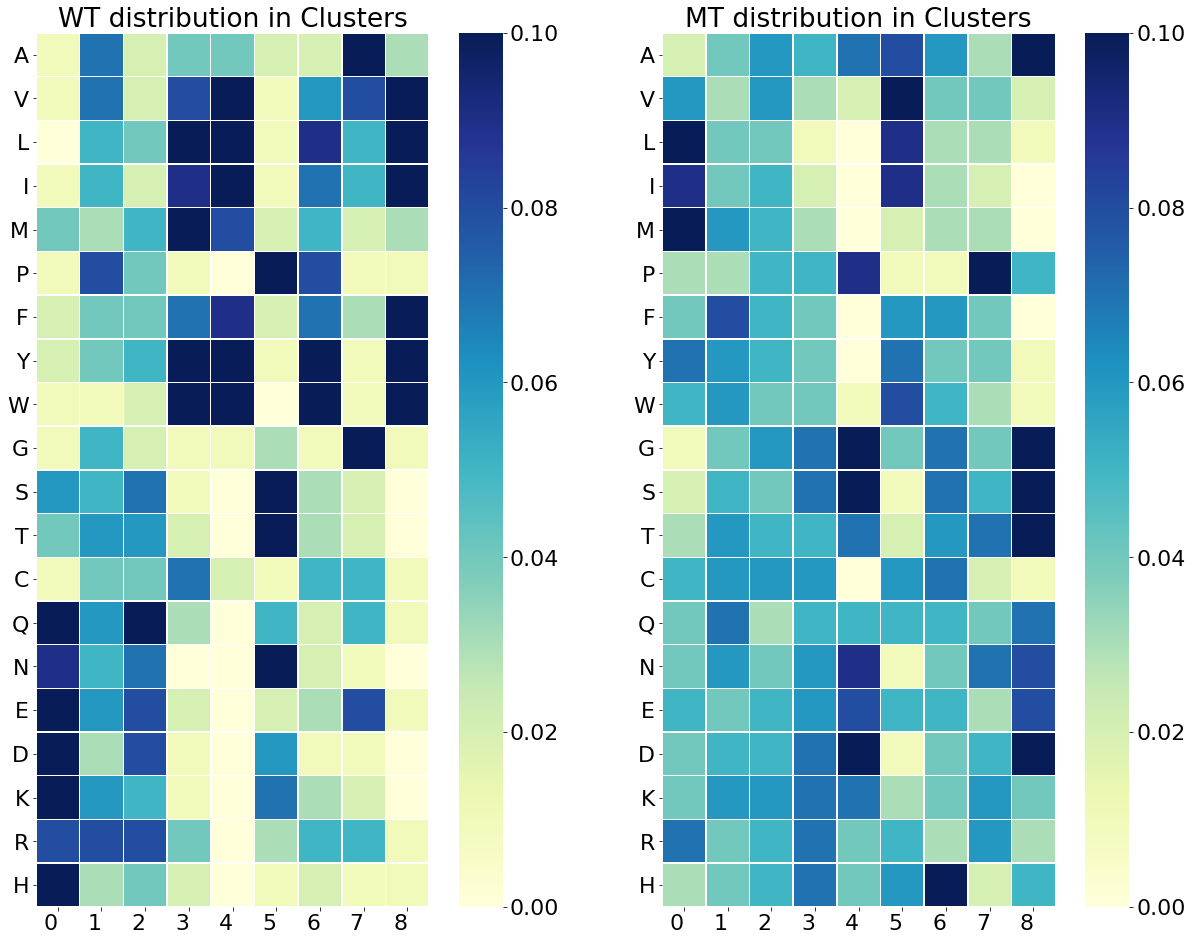

In [39]:
wt = list(result.S_WT.unique())
mt = list(result.S_MUT.unique())

wt = 'AVLIMPFYWGSTCQNEDKRH'
mt = 'AVLIMPFYWGSTCQNEDKRH'

cls = range(n_clust)

wt_table = np.zeros((len(wt), len(cls)))
mt_table = np.zeros((len(mt), len(cls)))


for i, s in enumerate(wt):
    for j in cls:
        wt_table[i, j] = len(result[(L == j) & (result["S_WT"] == s)])
        mt_table[i, j] = len(result[(L == j) & (result["S_MUT"] == s)])
    
wt_table /= wt_table.sum(axis=0)
mt_table /= mt_table.sum(axis=0)

      
    
plt.figure(figsize=(18, 26))

plt.subplot(221)
plt.title("WT distribution in Clusters")    
#plt.imshow(wt_table, vmin=0, vmax=0.10)
#plt.yticks(range(20), wt)
#plt.xticks(range(n_clust))
ax = sns.heatmap(
    np.round(wt_table, 2), 
    vmin=0, vmax=0.1,
    cmap="YlGnBu",
    square=True,
    linewidths=.5
)
ax.set_xticklabels(range(9))
ax.set_yticklabels(wt)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);



plt.subplot(222)
plt.title("MT distribution in Clusters")    
plt.imshow(mt_table, vmin=0, vmax=0.10)
ax = sns.heatmap(
    np.round(mt_table, 2), 
    vmin=0, vmax=0.1,
    cmap="YlGnBu",
    square=True,
    linewidths=.5
)
ax.set_xticklabels(range(9))
ax.set_yticklabels(wt)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);
plt.tight_layout()

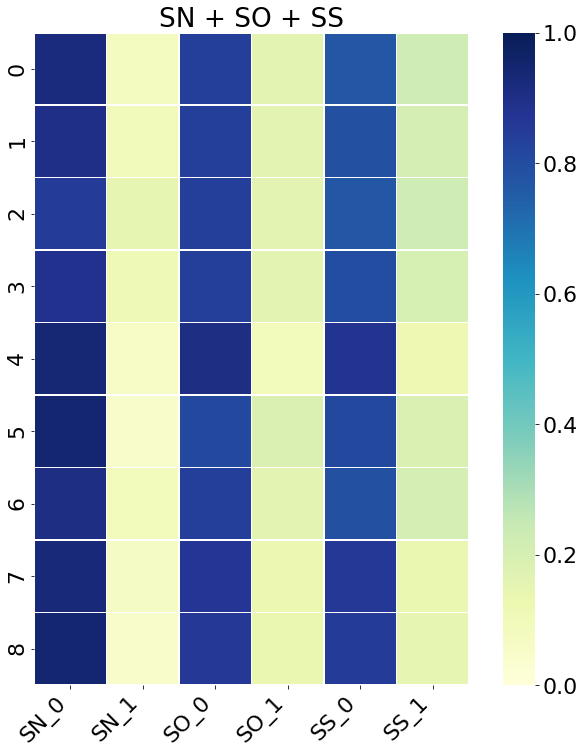

In [40]:
sss = np.zeros((6, len(cls)))

for num, i in enumerate(["SN", "SO", "SS"]):
    for j in range(n_clust):
        sss[2*num, j]     = len(result[(result[f"S_WT_{i}"] == 0) & (L == j)])
        sss[2*num + 1, j] = len(result[(result[f"S_WT_{i}"] == 1) & (L == j)])
        
        s = sum(L == j)
        
        sss[2*num, j]     /= s
        sss[2*num + 1, j] /= s

#plt.title("SN + SO + SS")
#plt.xticks(range(6), ["SN_0", "SN_1", "SO_0", "SO_1", "SS_0", "SS_1"], rotation="vertical")
#plt.imshow(sss.T)
#plt.ylabel("cluster")
#plt.xlabel("SSE + value")
plt.figure(figsize=(12, 12))

plt.title("SN + SO + SS")

ax = sns.heatmap(
    np.round(sss.T, 2), 
    vmin=0, vmax=1,
    cmap="YlGnBu",
    square=True,
    linewidths=.5
)
ax.set_xticklabels(["SN_0", "SN_1", "SO_0", "SO_1", "SS_0", "SS_1"])
ax.set_yticklabels(range(9))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=90,
    horizontalalignment='right'
);




## Radar Plots

In [79]:
import seaborn as sns

In [142]:
prog[;3]

SyntaxError: invalid syntax (<ipython-input-142-766feb7e0c85>, line 1)

In [80]:
angles=np.linspace(0, 2*np.pi, len(prog), endpoint=False)
stats = ddg.mean(axis=0)

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

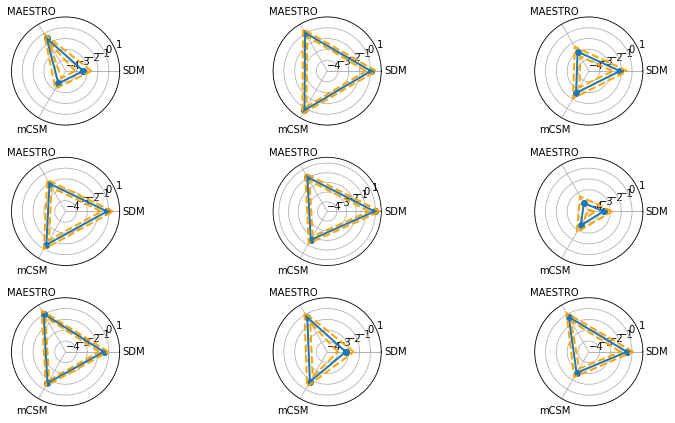

In [81]:
fig = plt.figure(figsize=(12, 6))
for i in range(9):
    angles=np.linspace(0, 2*np.pi, len(prog[:3]), endpoint=False)
    
    stats = ddg[L == i].mean(axis=0)
    d1 = stats - 1*ddg[L == i].std(axis=0)
    d2 = stats + 1*ddg[L == i].std(axis=0)
    d3 = ddg[L == i].std(axis=1).mean()
    
    stats = np.concatenate((stats,[stats[0]]))
    d1 =    np.concatenate((d1,   [d1[0]]))
    d2 =    np.concatenate((d2,   [d2[0]]))
    d3 =    np.array([d3]*(2000+1))
    
    
    angles = np.concatenate((angles,[angles[0]]))
    
    
    ax = fig.add_subplot(3, 3, 1+i, polar=True)
    
    ax.plot(angles, d1, '--', linewidth=2, color="orange")
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.plot(angles, d2, '--', linewidth=2, color="orange")
    
    #ax.plot(np.linspace(0, 2*np.pi, 2001, endpoint=False), d3, '--', linewidth=2, color="green")
    
    
    
    #ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, prog[:3])
    plt.yticks(range(-4, 2))
    #ax.set_title([df.loc[386,"Name"]])
    ax.grid(True)
plt.tight_layout()

In [262]:
L

array([1, 6, 1, ..., 3, 2, 3], dtype=int32)

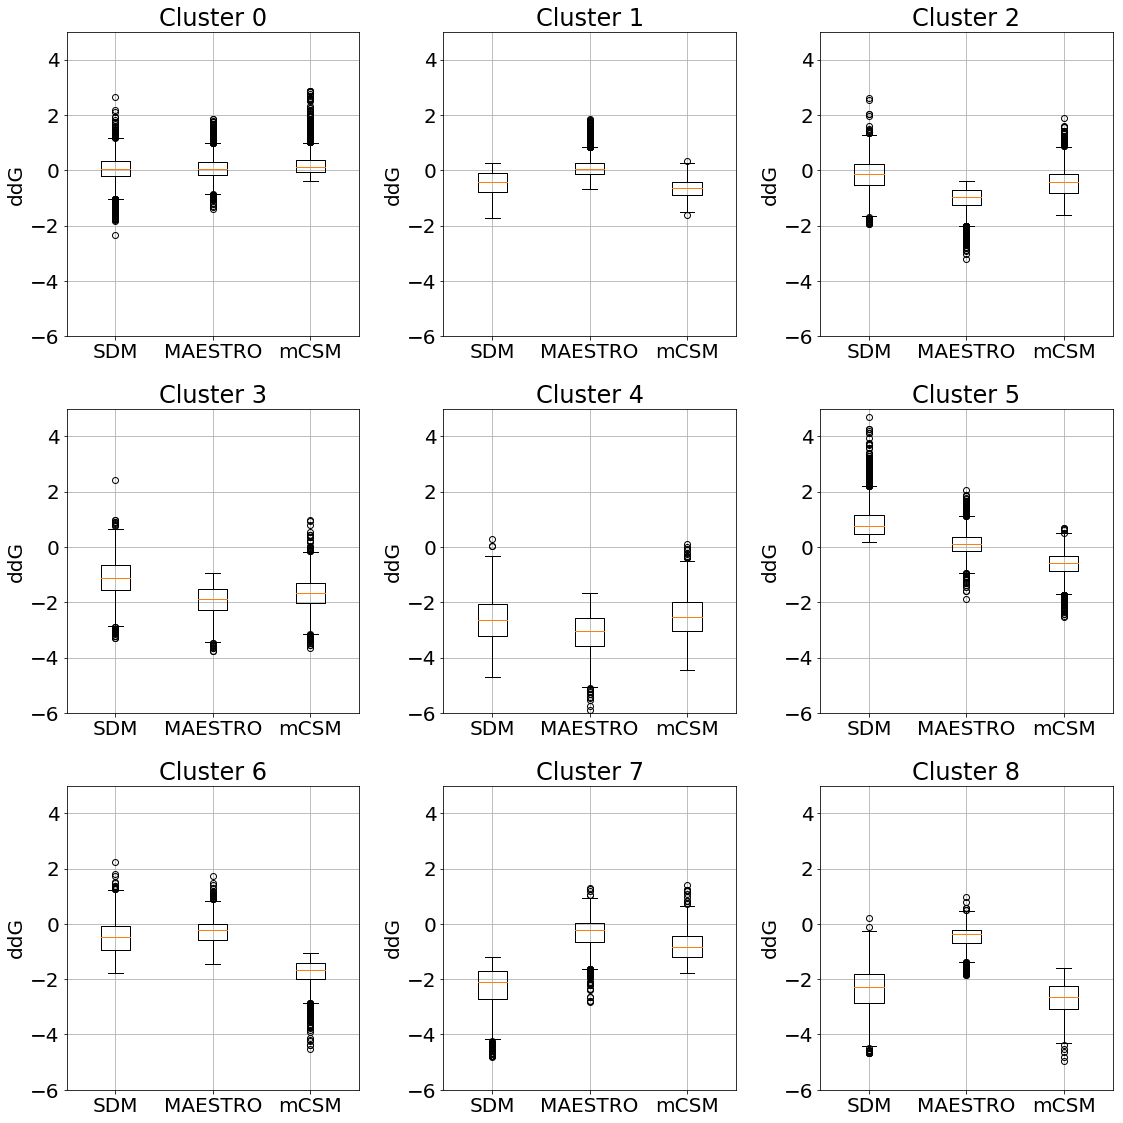

In [43]:
tmp = ddg.copy()
tmp['std'] = tmp.values.std(axis=1)
tmp['class'] = L
std_sort = tmp.groupby('class')['std'].mean().sort_values().index.values#to_numpy()


fig = plt.figure(figsize=(16, 16))
plt.rcParams.update({'font.size': 20})
for num, i in enumerate(std_sort):
    plt.subplot(3, 3, 1+num)
    plt.boxplot(ddg[L == i].T)
    plt.xticks(range(1, 4), prog)
    plt.title(f"Cluster {i}")
    plt.ylabel("ddG")
    plt.ylim(-6, 5)
    plt.grid()
    
plt.tight_layout()    
# plt.savefig('a.png', dpi=200)

In [84]:
result.head()

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,M_PDB,M_WT,M_POS,M_MUT,M_PRED_DDG,m_PDB,m_WT,m_POS,m_MUT,m_PRED_DDG
key,,,,,,,,,,,,,,,,,,,,,
1AL0_M_1_A,1AL0,B,1,M,A,b,68.0,3.33,0.12,0,...,1AL0,M,1,A,0.453225,1AL0,M,1.0,A,-0.143
1AL0_M_1_C,1AL0,B,1,M,C,b,68.0,3.33,0.12,0,...,1AL0,M,1,C,0.520635,1AL0,M,1.0,C,-0.328
1AL0_M_1_D,1AL0,B,1,M,D,b,68.0,3.33,0.12,0,...,1AL0,M,1,D,1.035553,1AL0,M,1.0,D,0.276
1AL0_M_1_E,1AL0,B,1,M,E,b,68.0,3.33,0.12,0,...,1AL0,M,1,E,1.273418,1AL0,M,1.0,E,0.230
1AL0_M_1_F,1AL0,B,1,M,F,b,68.0,3.33,0.12,0,...,1AL0,M,1,F,0.744781,1AL0,M,1.0,F,-0.127


## Filter by std

In [85]:
s = minmax_scale(ddg[["S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"]].std(axis=1).values)
S = ddg[["S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"]].std(axis=1).values
l = [] # lenght

corr = np.zeros((49, 3))

for num, i in enumerate(np.linspace(0, 1, 50)[::-1][:-1]):
    mask = i > s
    tmp = ddg[mask]
    l.append(sum(mask))
    #print(np.corrcoef(tmp.T)[0:3][5])
    #corr[num, :] = np.corrcoef(tmp.T)[5, 0:3]

Text(0.5, 0, 'std')

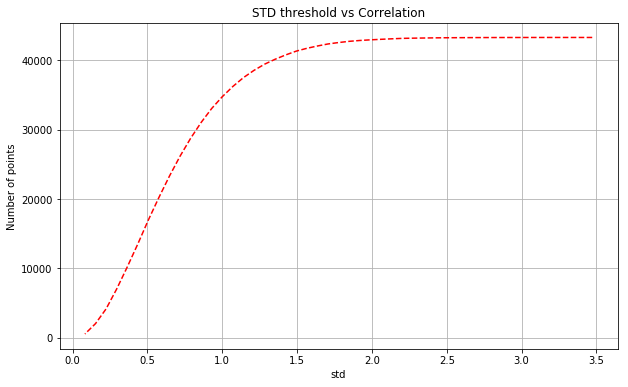

In [86]:
std = (np.linspace(0, 1, 50)[::-1][:-1] + min(S)) * (max(S) - min(S))

plt.figure(figsize=(10, 6))
plt.title("STD threshold vs Correlation")
    
plt.plot(std, l, '--', c="red")
plt.ylabel("Number of points")
plt.grid()
plt.xlabel("std")

## Small dataset AGAIN

In [2]:
prog = ["SDM", "MAESTRO", "mCSM", "CUPSAT", "MuPro", "real.table"]
df_small = []
for i in range(6):
    df_small.append(readRDS(f"res.{prog[i]}.rds"))
    df_small[i] = df_small[i].set_index("key")
    if i == 1 or i == 3:
        df_small[i]["PRED_DDG"] = -df_small[i]["PRED_DDG"]
    df_small[i] = df_small[i].add_prefix(f"{prog[i][0:2]}_")

In [3]:
result_small = pd.concat(df_small, axis=1, join_axes=[df_small[0].index])
result_small.head()

,SD_PDB,SD_Chain.ID,SD_POS,SD_WT,SD_MUT,SD_WT_SSE,SD_WT_RSA...,SD_WT_DEPTH..angstrom.,SD_WT_OSP,SD_WT_SS,...,CU_WT,CU_POS,CU_MUT,CU_PRED_DDG,Mu_PDB,Mu_POS,Mu_WT,Mu_MUT,Mu_PRED_DDG,re_DDG
key,,,,,,,,,,,,,,,,,,,,,
1A0F_S_11_A,1A0F,A,11,S,A,a,0.000000,7.91,0.539,0,...,S,11.0,A,-0.90,1A0F,11,S,A,-0.51785958,-1.8
1A5E_D_74_N,1A5E,A,74,D,N,b,15.600000,4.18,0.435,1,...,D,74.0,N,-4.03,1A5E,74,D,N,-1.4072279,-2.0
1A5E_P_81_L,1A5E,A,81,P,L,H,0.000000,8.53,0.547,0,...,P,81.0,L,3.93,1A5E,81,P,L,-0.35977395,0.0
1A5E_D_84_N,1A5E,A,84,D,N,H,3.200000,5.65,0.547,1,...,D,84.0,N,0.67,1A5E,84,D,N,-0.092715812,-0.1
1A7C_R_30_E,1A7C,A,30,R,E,b,65.099998,3.27,0.285,0,...,R,30.0,E,-0.24,1A7C,30,R,E,-1.1570861,-1.2


In [7]:
ddg_small = result_small[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG", "CU_PRED_DDG", "Mu_PRED_DDG", "re_DDG"]].dropna().astype(float)
ddg_small.head()

,SD_PRED_DDG,MA_PRED_DDG,mC_PRED_DDG,CU_PRED_DDG,Mu_PRED_DDG,re_DDG
key,,,,,,
1A0F_S_11_A,0.60,-0.761365,-0.970,-0.90,-0.517860,-1.8
1A5E_D_74_N,0.19,-1.594357,-0.214,-4.03,-1.407228,-2.0
1A5E_P_81_L,3.38,0.528720,-0.932,3.93,-0.359774,0.0
1A5E_D_84_N,0.47,-1.216384,-1.141,0.67,-0.092716,-0.1
1A7C_R_30_E,-0.24,-0.958248,0.058,-0.24,-1.157086,-1.2


In [90]:
s = minmax_scale(out.decision_function(ddg_small[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG"]].values))
S = out.decision_function(ddg_small[["SD_PRED_DDG", "MA_PRED_DDG", "mC_PRED_DDG"]].values)
l = [] # lenght

corr = np.zeros((49, 3))

for num, i in enumerate(np.linspace(0, 1, 50)[1:]):
    mask = i > s
    tmp = ddg_small[mask]
    l.append(sum(mask))
    #print(np.corrcoef(tmp.T)[0:3][5])
    corr[num, :] = np.corrcoef(tmp.T)[5, 0:3]

/home/dpreer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/dpreer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/dpreer/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


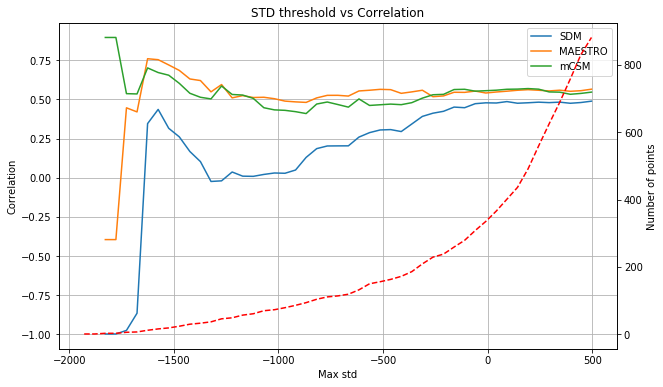

In [91]:
std = np.linspace(0, 1, 50)[1:] * (max(S) - min(S)) + min(S)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.title("STD threshold vs Correlation")

for num, i in enumerate(prog[:3]):
    ax1.plot(std, corr[:, num], label=prog[num])
    
ax2.plot(std, l, '--', c="red")

ax1.legend()
ax1.set_xlabel("Max std")
ax1.set_ylabel("Correlation")
ax2.set_ylabel("Number of points")
ax1.grid()

/home/dpreer/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'distribution of real and  predicted ddG')

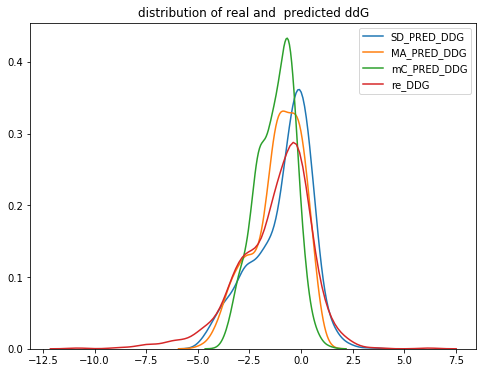

In [92]:
plt.figure(figsize=(8, 6))
sb.kdeplot(ddg_small["SD_PRED_DDG"])
sb.kdeplot(ddg_small["MA_PRED_DDG"])
sb.kdeplot(ddg_small["mC_PRED_DDG"])
sb.kdeplot(ddg_small["re_DDG"])
plt.title("distribution of real and  predicted ddG")

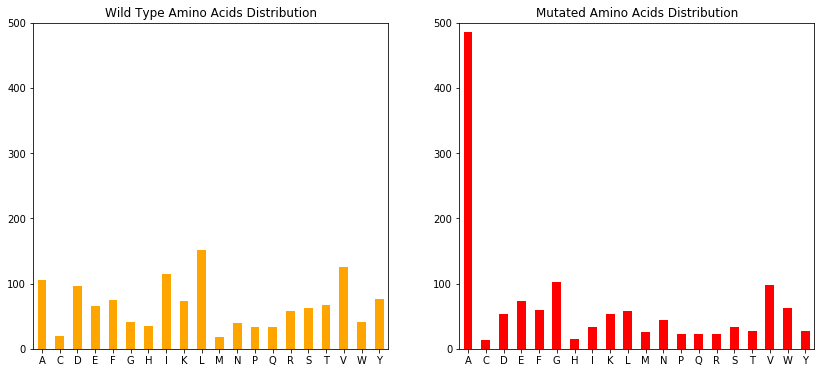

In [93]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.ylim(0, 500)
plt.title("Wild Type Amino Acids Distribution")
pd.get_dummies(result_small.SD_WT).sum(axis=0).plot.bar(rot=0, color="orange")

plt.subplot(122)
plt.ylim(0, 500)
plt.title("Mutated Amino Acids Distribution")
pd.get_dummies(result_small.SD_MUT).sum(axis=0).plot.bar(rot=0, color="red")

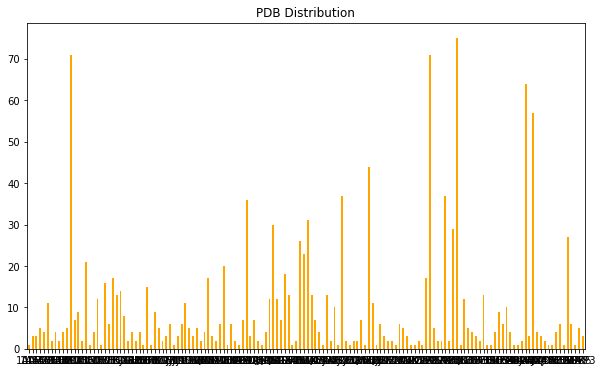

In [94]:
plt.figure(figsize=(10, 6))

plt.title("PDB Distribution")
pd.get_dummies(result_small.SD_PDB).sum(axis=0).plot.bar(rot=0, color="orange")


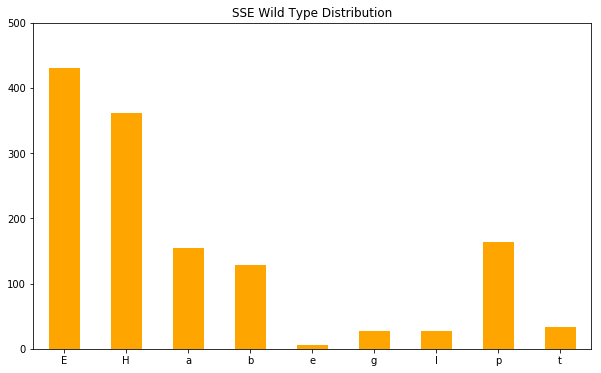

In [95]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 500)
plt.title("SSE Wild Type Distribution")
pd.get_dummies(result_small.SD_WT_SSE).sum(axis=0).plot.bar(rot=0, color="orange")


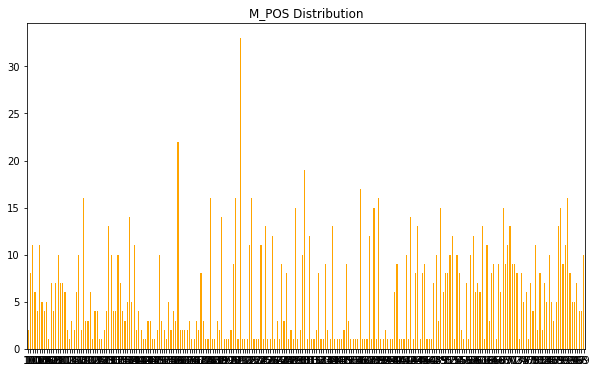

In [96]:
plt.figure(figsize=(10, 6))

plt.title("M_POS Distribution")
pd.get_dummies(result_small.SD_POS).sum(axis=0).plot.bar(rot=0, color="orange")

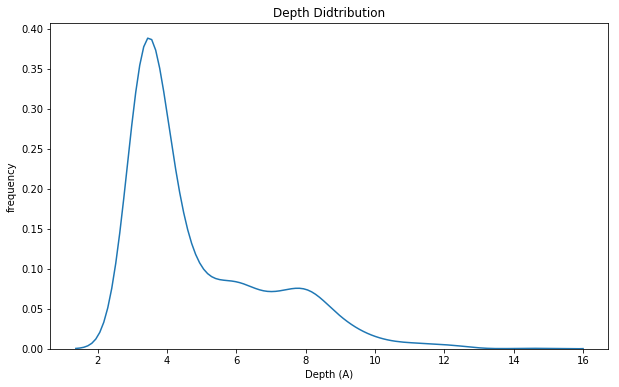

In [97]:
plt.figure(figsize=(10, 6))
plt.title("Depth Didtribution")
plt.ylabel("frequency")
plt.xlabel("Depth (A)")
sb.kdeplot(result_small["SD_MT_DEPTH..angstrom."].values)

## SDM Full

In [4]:
df_S = []
df_S.append(readRDS(f"res.full.SDM.rds"))
df_S[0] = df_S[0].set_index("key")
df_S[0] = df_S[0].add_prefix(f"S_")
df_S.append(readRDS(f"res.real.table.rds"))
df_S[1] = df_S[1].set_index("key")
df_S[1] = df_S[1].add_prefix(f"R_")

In [5]:
result_S = pd.concat(df_S, axis=1, join_axes=[df_S[0].index])
result_S.sample(5)
#result.shape

,S_PDB,S_Chain.ID,S_POS,S_WT,S_MUT,S_WT_SSE,S_WT_RSA...,S_WT_DEPTH..angstrom.,S_WT_OSP,S_WT_SS,...,S_MT_SSE,S_MT_RSA...,S_MT_DEPTH..angstrom.,S_MT_OSP,S_MT_SS,S_MT_SN,S_MT_SO,S_PRED_DDG,S_Outcome,R_DDG
key,,,,,,,,,,,,,,,,,,,,,
1FKJ_T_75_A,1FKJ,A,75,T,A,E,20.700001,4.25,0.375,0,...,E,21.799999,4.42,0.388,0,0,0,-0.50,Reduced stability,-2.650000
1CSP_R_56_Q,1CSP,A,56,R,Q,a,100.400002,3.23,0.032,0,...,a,84.699997,3.33,0.072,0,0,0,-0.06,Reduced stability,0.263158
2TRX_T_66_L,2TRX,A,66,T,L,H,0.300000,6.09,0.528,1,...,H,2.500000,5.71,0.574,0,0,0,1.30,Increased stability,-1.400000
2VY0_E_53_A,2VY0,A,53,E,A,a,22.900000,4.19,0.433,1,...,a,31.400000,3.51,0.370,0,0,0,-0.15,Reduced stability,-6.596558
1PFL_G_117_V,1PFL,A,117,G,V,g,116.099998,3.35,0.203,0,...,g,99.300003,3.19,0.142,0,0,0,-2.64,Reduced stability,-2.650000


In [6]:
ddg_S = result_S[["S_PRED_DDG", "R_DDG"]]
ddg_S['AvDiv'] = np.abs(ddg_S['S_PRED_DDG'] - ddg_S['R_DDG'])
ddg_S.head()

/home/dpreer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,S_PRED_DDG,R_DDG,AvDiv
key,,,
1A43_G_156_A,0.02,-1.90,1.92
1A43_E_159_D,-0.52,-3.50,2.98
1A43_R_167_A,-0.09,-3.05,2.96
1A43_W_184_A,0.47,-0.70,1.17
1A43_C_218_S,-0.93,-2.55,1.62


Text(0.5, 1.0, 'distribution of real and  predicted ddG')

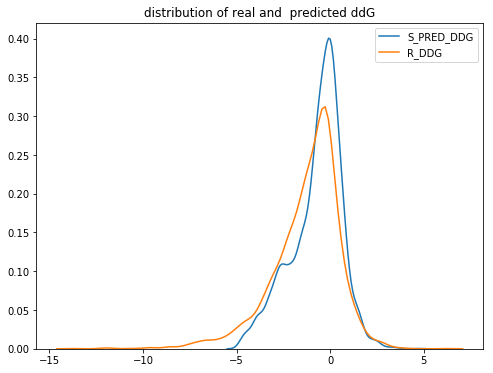

In [101]:
plt.figure(figsize=(8, 6))
sb.kdeplot(ddg_S["S_PRED_DDG"])
sb.kdeplot(ddg_S["R_DDG"])
plt.title("distribution of real and  predicted ddG")

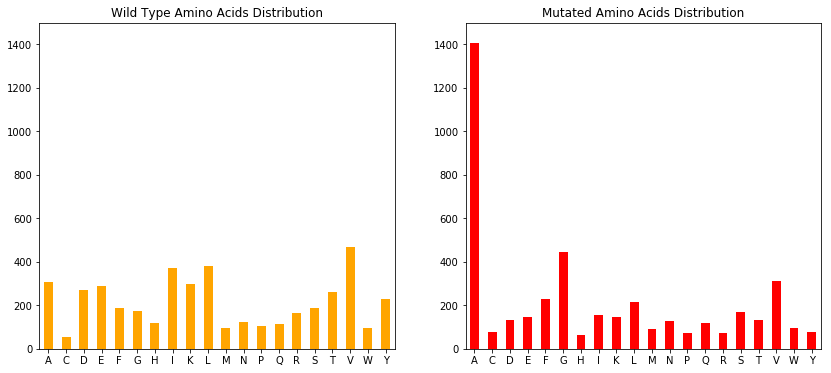

In [102]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.ylim(0, 1500)
plt.title("Wild Type Amino Acids Distribution")
pd.get_dummies(result_S.S_WT).sum(axis=0).plot.bar(rot=0, color="orange")

plt.subplot(122)
plt.ylim(0, 1500)
plt.title("Mutated Amino Acids Distribution")
pd.get_dummies(result_S.S_MUT).sum(axis=0).plot.bar(rot=0, color="red")

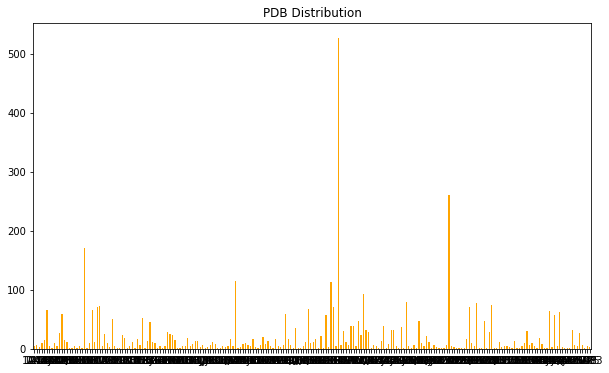

In [103]:
plt.figure(figsize=(10, 6))

plt.title("PDB Distribution")
pd.get_dummies(result_S.S_PDB).sum(axis=0).plot.bar(rot=0, color="orange")


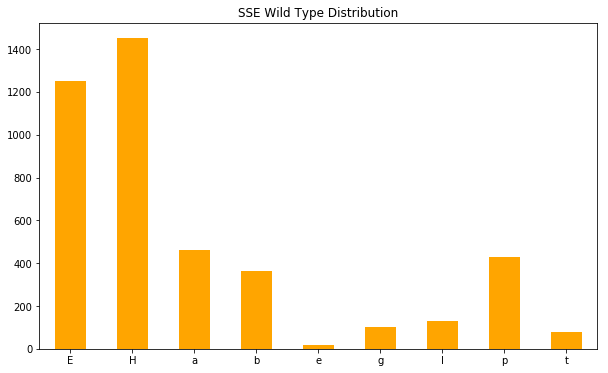

In [104]:
plt.figure(figsize=(10, 6))

plt.title("SSE Wild Type Distribution")
pd.get_dummies(result_S.S_WT_SSE).sum(axis=0).plot.bar(rot=0, color="orange")


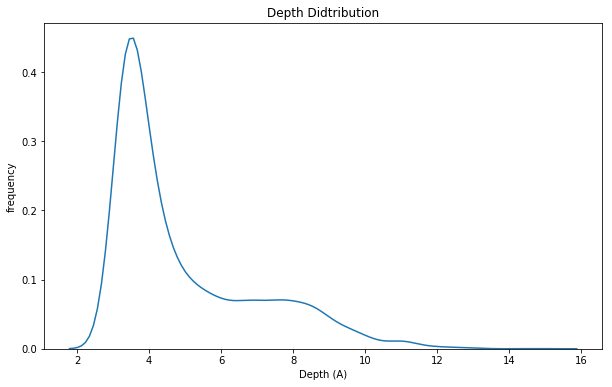

In [105]:
plt.figure(figsize=(10, 6))
plt.title("Depth Didtribution")
plt.ylabel("frequency")
plt.xlabel("Depth (A)")
sb.kdeplot(result_S["S_WT_DEPTH..angstrom."].values)

## Datasets distributions

In [84]:
r_datasets = [result, 
              result_S, 
              result_small.rename(lambda x: "S_" + x[3:] if x[:3] == "SD_" else x, axis="columns")
             ]

d_datasets = [ddg, ddg_S, ddg_small.rename({"SD_PRED_DDG":"S_PRED_DDG"}, axis="columns")]
colors = ["#C5919D", "#2096BA", "#DF6E21"]
names = ["3", "1", "2"]

### WT and MT

In [85]:
WT=pd.concat([pd.get_dummies(x.S_WT).sum(axis=0).rename(names[num]) for num, x in enumerate(r_datasets)], axis=1)
WT /= WT.sum(axis=0)

MT=pd.concat([pd.get_dummies(x.S_MUT).sum(axis=0).rename(names[num]) for num, x in enumerate(r_datasets)], axis=1)
MT /= MT.sum(axis=0)


In [86]:
AA = {"A": "A V L I M P".split(), 
      "Ar":"E Y W".split(), 
      "P": "G S T C Q N".split(), 
      "NC":"E D".split(), 
      "PC":"K R H".split()} 

per = []
for i in AA:
    per += AA[i]

#Aliphatic, Aromatic, Polar, Negative Charged, Positive Charged
"".join(per)

'AVLIMPEYWGSTCQNEDKRH'

In [87]:
WT.loc[["A", "C"]]

,3,1,2
A,0.039914,0.071329,0.078829
C,0.032458,0.012821,0.014264


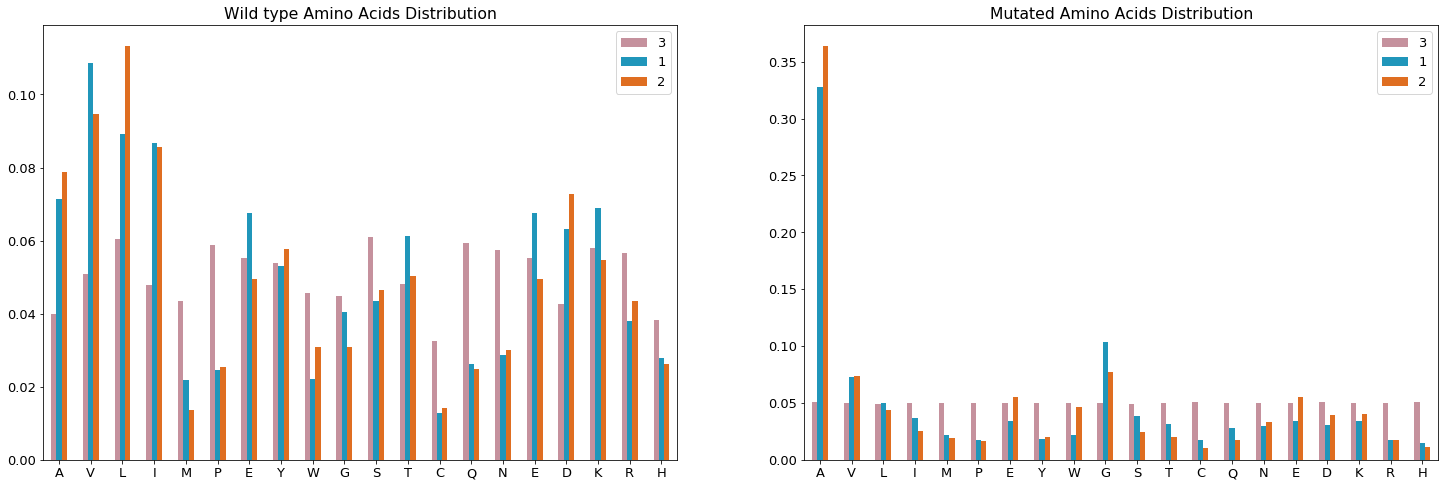

In [150]:
plt.rcParams.update({'font.size': 13})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

WT.loc[per].plot(ax=axes[0], kind='bar', rot=0, title="Wild type Amino Acids Distribution", color=colors)

MT.loc[per].plot(ax=axes[1], kind='bar', rot=0, title="Mutated Amino Acids Distribution", color=colors)


### SSE

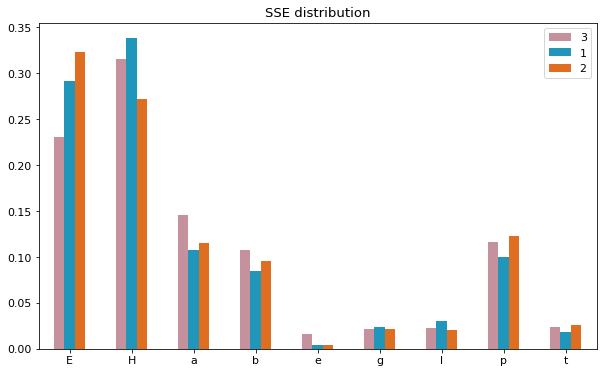

In [95]:
SSE=pd.concat([pd.get_dummies(x.S_WT_SSE).sum(axis=0).rename(names[num]) for num, x in enumerate(r_datasets)], axis=1)
SSE /= SSE.sum(axis=0)


SSE.plot.bar(rot=0, color=colors, figsize=(10, 6), title="SSE distribution")


### Depth

In [96]:
r_datasets[0]["S_WT_DEPTH..angstrom."].sample()

key
2VBU_G_85_M    3.29
Name: S_WT_DEPTH..angstrom., dtype: float64

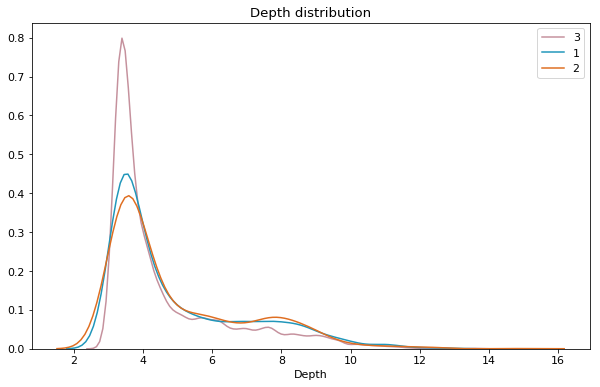

In [102]:
plt.figure(figsize=(10, 6))
plt.title("Depth distribution")
plt.xlabel("Depth")
for num, d in enumerate(r_datasets):
    sns.kdeplot(d["S_WT_DEPTH..angstrom."], color=colors[num], label=names[num])

features that are important 
S_WT, S_WT, S_WT_SSE, S_WT_RSA, S_WT_DEPTH..angstrom., S_WT_OSP, S_WT_SS, S_WT_SN, S_WT_SO

### OSP

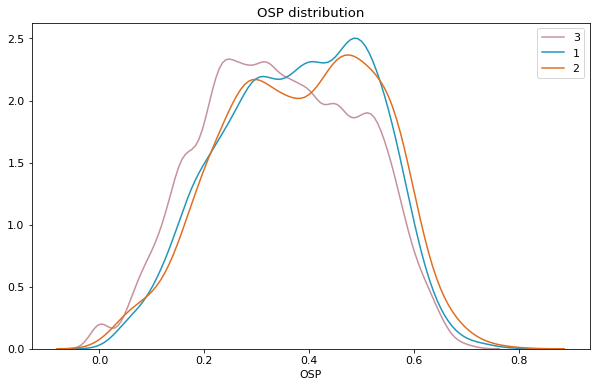

In [98]:
plt.figure(figsize=(10, 6))
plt.title("OSP distribution")
plt.xlabel("OSP")
for num, d in enumerate(r_datasets):
    sns.kdeplot(d["S_WT_OSP"], color=colors[num], label=names[num])

### RSA

/home/dpreer/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


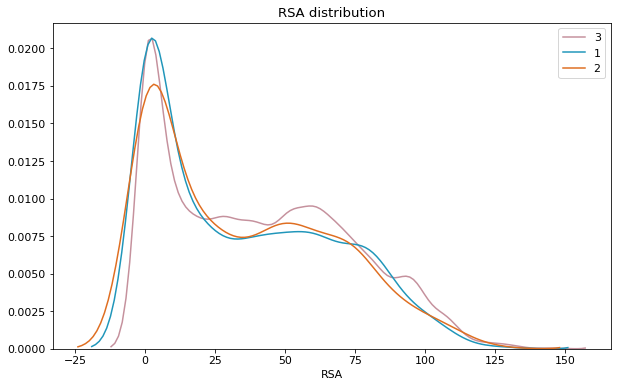

In [100]:
plt.figure(figsize=(10, 6))
plt.title("RSA distribution")
plt.xlabel("RSA")
for num, d in enumerate(r_datasets):
    sns.kdeplot(d["S_WT_RSA..."], color=colors[num], label=names[num])

## Model and Validation

In [168]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import r2_score
import catboost
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from catboost import CatBoostRegressor
pandas2ri.activate()

readRDS = robjects.r['readRDS']
prog = ["SDM", "MAESTRO", "mCSM"]
df = []
for i in range(3):
    df.append(readRDS(f"res.ready.{prog[i]}.rds"))
    df[i] = df[i].set_index("key")
    if i == 1:
        df[i]["PRED_DDG"] = -df[i]["PRED_DDG"]
    df[i] = df[i].add_prefix(f"{prog[i][0]}_")
result = pd.concat(df, axis=1, join_axes=[df[0].index])
result.head()
ddg = result[["S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"]]
result["std"] = np.std(result[["S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"]].T)

In [172]:
### features for OHE
X_train, X_test = train_test_split(list(result["S_PDB"].unique()), test_size=0.2)
OHE = pd.concat([result, 
                 pd.get_dummies(result.S_WT_SSE), 
                 pd.get_dummies(result.S_WT).add_prefix("w_"), 
                 pd.get_dummies(result.S_MUT).add_prefix("m_")], axis=1)


X_train = OHE[OHE["S_PDB"].isin(X_train)]

y_train = X_train["std"]
# X_train = X_train.select_dtypes(include=['float64', "int32", "uint8"]).drop(["m_POS", "std", "S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"], axis=1)

X_test = OHE[OHE["S_PDB"].isin(X_test)]

y_test = X_test["std"]
# X_test = X_test.select_dtypes(include=['float64', "int32", "uint8"]).drop(["m_POS", "std", "S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"], axis=1)


# model = Pipeline([("SS", SS()), ("svm", SVR())])
# model.fit(X_train, y_train)


# print(model.score(X_train, y_train), 
#       model.score(X_test, y_test))

In [173]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureDrop(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.a = 1

    def fit_transform(self, X, y=None, W=None, H=None):
#         print(X)
        return X.select_dtypes(include=['float64', "int32", "uint8"]).drop(["m_POS", "std", "S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"], axis=1)

    def fit(self, X, y=None, **params):
        return self

    def transform(self, X):
        return X.select_dtypes(include=['float64', "int32", "uint8"]).drop(["m_POS", "std", "S_PRED_DDG", "M_PRED_DDG", "m_PRED_DDG"], axis=1)
 
    def inverse_transform(self, W):
        pass

In [174]:
from sklearn.model_selection import ShuffleSplit

def ugly_ind(ind):
    return [num for num, i in enumerate(ind) if i is True]

class ProteinCrossValidation:
    def __init__(self, n_splits=3):
        self.n_splits = n_splits

    def split(self, X, y=None, groups=None):
        ID = X["S_PDB"].unique()
        for train_set, test_set in ShuffleSplit(n_splits=self.n_splits).split(ID):
            train_set = ID[train_set]
            test_set = ID[test_set]
            train_ind = X['S_PDB'].isin(train_set)
            test_ind = X['S_PDB'].isin(test_set)
#             print(test_set)
#             print(np.array(ugly_ind(train_ind)))
            yield np.array(ugly_ind(train_ind)), np.array(ugly_ind(test_ind))

    def get_n_splits(self, X, y, groups=None):
        return self.n_splits

In [175]:
from sklearn.metrics import make_scorer
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

model = Pipeline([('drop', FeatureDrop()), ("SS", SS()), ("svm", SVR())])

svc_search = {
    'svm__C': np.linspace(0.1, 2, 6),
}

opt = GridSearchCV(
    model,
    svc_search, # (parameter space, # of evaluations)
    cv=ProteinCrossValidation(),
    scoring=make_scorer(r2_score), 
    n_jobs=-1, 
    verbose=10

)

opt.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] svm__C=0.1 ......................................................
[CV] svm__C=0.1 ......................................................
[CV] svm__C=0.1 ......................................................
[CV] svm__C=0.48 .....................................................
[CV] svm__C=0.48 .....................................................
[CV] svm__C=0.48 .....................................................
[CV] svm__C=0.86 .....................................................
[CV] svm__C=0.86 .....................................................
[CV] svm__C=0.86 .....................................................
[CV] svm__C=1.2400000000000002 .......................................
[CV] svm__C=1.2400000000000002 .......................................
[CV] svm__C=1.2400000000000002 .......................................
[CV] svm__C=1.62 .....................................................
[CV] svm__C=1.62 

Process ForkPoolWorker-20:
Process ForkPoolWorker-19:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):


KeyboardInterrupt: 